In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
import librosa
import librosa.display

In [4]:
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Datasets\Tess\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Datasets\Tess\TESS Toronto emotional speech se...,angry
1,Datasets\Tess\TESS Toronto emotional speech se...,angry
2,Datasets\Tess\TESS Toronto emotional speech se...,angry
3,Datasets\Tess\TESS Toronto emotional speech se...,angry
4,Datasets\Tess\TESS Toronto emotional speech se...,angry


In [7]:
df['label'].value_counts()


label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

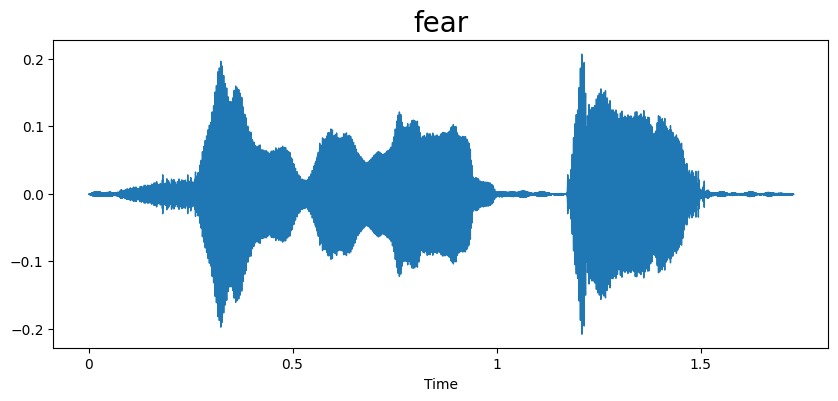

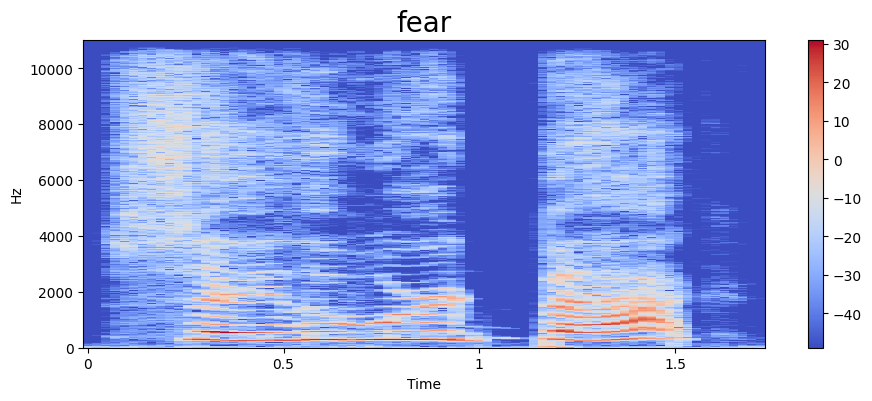

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [32]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [28]:
def extract_croma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma


In [29]:
extract_croma(df['speech'][0])

array([0.4262295 , 0.41856948, 0.20745976, 0.16529508, 0.23515208,
       0.23040178, 0.21471731, 0.35165364, 0.38117328, 0.24995363,
       0.3043435 , 0.4350452 ], dtype=float32)

In [33]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101454e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585308e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722104e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996327e+00, -1.82390726e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649140e+00],
      dtype=float32)

In [12]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550476, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.22003, 89.83577, 27.215466, 16.407124, 1...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572517, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261614, ...
Name: speech, Length: 2800, dtype: object

In [13]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)
svd.fit(X)
X_transformed = svd.transform(X)

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Train an SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='auto',random_state=42)


In [20]:
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma='auto', random_state=42)

In [21]:
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9821428571428571


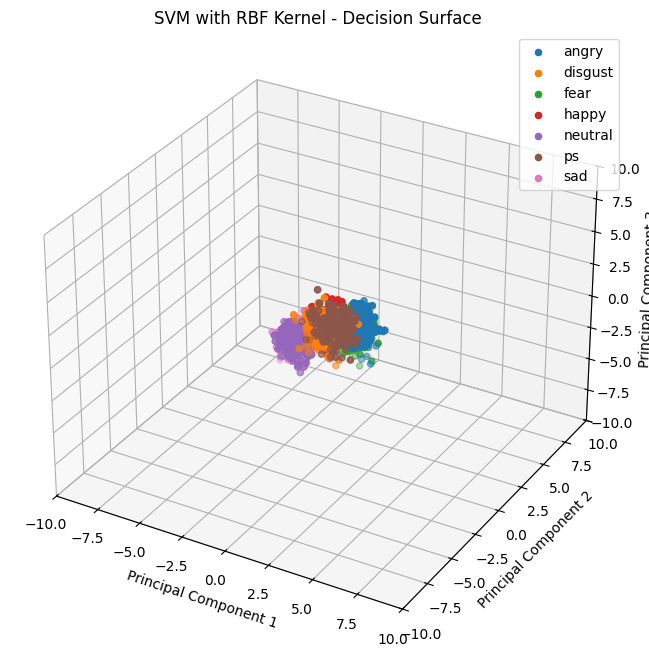

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D space
for label in np.unique(y_train):
    ax.scatter(X_train_scaled[y_train == label, 0],
               X_train_scaled[y_train == label, 1],
               X_train_scaled[y_train == label, 2],
               label=le.inverse_transform([label])[0])

# Plot the decision surface of the SVM
ax.set_title('SVM with RBF Kernel - Decision Surface')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the limits for each dimension
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.legend()
plt.show()


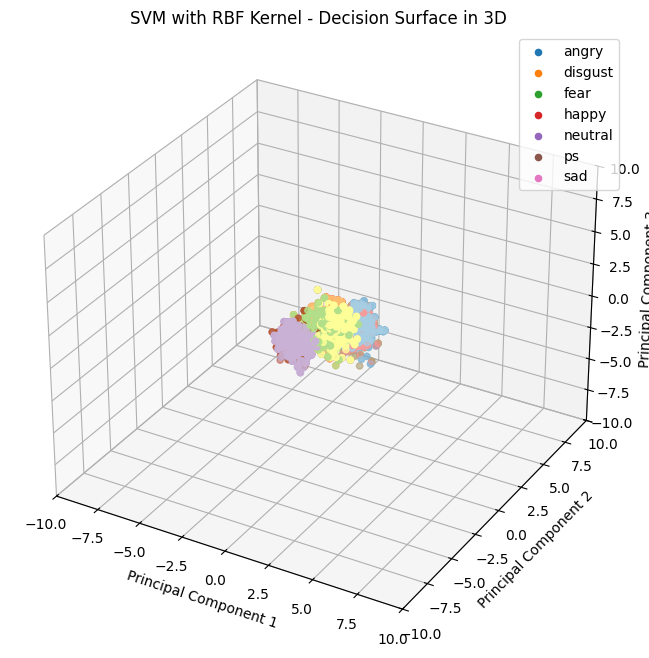

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D space using the first three principal components
for label in np.unique(y_train):
    ax.scatter(X_train_scaled[y_train == label, 0],
               X_train_scaled[y_train == label, 1],
               X_train_scaled[y_train == label, 2],
               label=le.inverse_transform([label])[0])

# Plot the decision surface of the SVM on the 3D space
Z = svm_model.predict(X_train_scaled)
Z = Z.reshape(X_train_scaled[:, 0].shape)
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=Z, cmap=plt.cm.Paired)

# Set the title and labels for the axes
ax.set_title('SVM with RBF Kernel - Decision Surface in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the limits for each dimension
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.legend()
plt.show()


In [24]:
train_acc = []
val_acc = []

for epoch in range(50):
    # Train the model for one epoch
    svm_model.fit(X_train_scaled, np.argmax(y_train, axis=1))
    
    # Calculate the training accuracy for the current epoch
    y_train_pred = svm_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
    train_acc.append(train_accuracy)
    
    # Calculate the validation accuracy for the current epoch
    y_val_pred = svm_model.predict(X_test_scaled)
    val_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_val_pred)
    val_acc.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Accuracy: {train_accuracy:.3f}, Validation Accuracy: {val_accuracy:.3f}")

# Plot the train and validation accuracy over the epochs
import matplotlib.pyplot as plt

plt.plot(range(1, 51), train_acc, label='train accuracy')
plt.plot(range(1, 51), val_acc, label='validation accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1